# Torrence and Compo 1998
## [sst_nino3.data example based on NCL](https://github.com/NCAR/geocat-scratch/blob/main/geocat-comp/wavelet/wavelet_WORKING.ncl)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets
import pandas as pd
import math

import pywt

In [2]:
# Download nino data
#nino_url = 'https://paos.colorado.edu/research/wavelets/wave_idl/nino3sst.txt'
#sst_data = np.genfromtxt(nino_url, skip_header=19)

# Collect Data from Local Source (after downloaded)
sst_data = np.loadtxt("data/nino3sst_trimmed.txt")
time_0 = 1871.0
dt = 0.25  # years (4 per year, seasonal)
time_range = (np.arange(0, len(sst_data)) * dt) + time_0 # from 1871.00 to 1996.75

sst_df = pd.DataFrame({'time (years)': time_range, 'temperature (C)': sst_data})

sst_df.head()

,time (years),temperature (C)
0,1871.00,-0.15
1,1871.25,-0.30
2,1871.50,-0.14
3,1871.75,-0.41
4,1872.00,-0.46


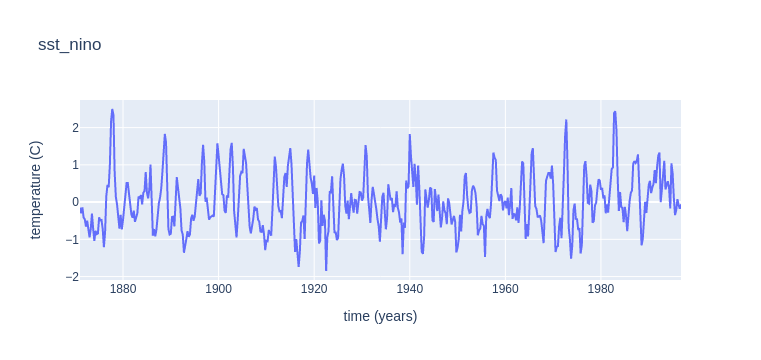

In [4]:
# Plot data
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'jupyterlab'

fig = px.line(data_frame=sst_df, x="time (years)", y="temperature (C)",
              title="sst_nino")
fig.show()

# Choosing Scales
Large scale correspond to strenched wavelets that are sensitive to low frequency analysis

Small scales correspodn to a squished wavelet that are sensitive to high freqeuncy analysis

PyWavelets = "for example, at scale=10 the wavelet is stretched by a factor of 10, making it sensitive to lower frequencies in the signal...To relate a given scale to a specific signal frequency, the sampling period of the signal must be known. pywt.scale2frequency() can be used to convert a list of scales to their corresponding frequencies. The proper choice of scales depends on the chosen wavelet, so pywt.scale2frequency() should be used to get an idea of an appropriate range for the signal of interest."

In [5]:
# pywavelets scale2frequency(wavelet, scale)/ sampling_period
# can be used to determine what the physical frequency f is
# f is in hertz when using a sampling_period in seconds

## Plot 1: Power Spectrum
Wavelet_coeff is a complex numbre with a real and an imaginary number (1 + 2i). The power spectrum plots the real component of the complex number

```python
real_component = np.log2(np.square(abs(wavelet_coeffs)))
```

The real component represents the magntiude of the wavelet coefficient

size (44, 504) with 44 scales and 504 time steps
x-axis (time) be default is: 504
y-axis (scale) be default is: 44


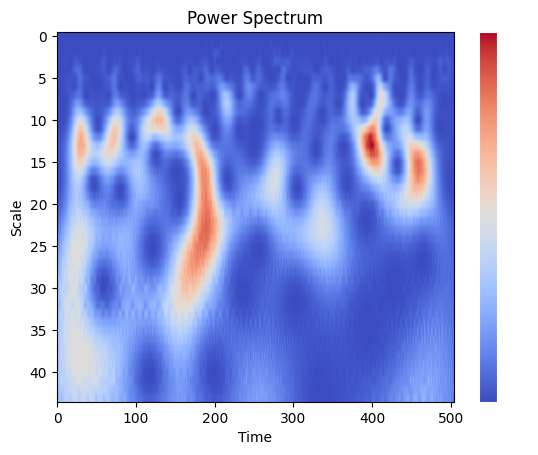

In [6]:
wavelet_mother = "cmor1.5-1.0" # Morlet in Torrence/Compo cooresponds to cmor in PyWavelets -> https://github.com/PyWavelets/pywt/issues/522#issuecomment-539227912

dt = 0.25 # sampling period (time between each y-value)
s0 = 0.25 # smallest scale
dj = 0.25 # spacing between discrete scales
n = len(sst_data)
jtot = 44
# npad = 1024 # pad with extra zeros (TODO)
# noise = 1 # test vs. red noise (TODO: no current implementation)
scales = np.arange(1, jtot+1)
wavelet_coeffs, freqs = pywt.cwt(data=sst_data,
                                 scales=scales,
                                 wavelet=wavelet_mother,
                                 sampling_period=dt)

# Shape of wavelet transform
print(f"size {wavelet_coeffs.shape} with {wavelet_coeffs.shape[0]} scales and {wavelet_coeffs.shape[1]} time steps")
print(f"x-axis (time) be default is: {wavelet_coeffs.shape[1]}")
print(f"y-axis (scale) be default is: {wavelet_coeffs.shape[0]}")

# Plot scalogram
fig, ax = plt.subplots()
plt.style.use('dark_background')
data = np.power((abs(wavelet_coeffs)), 2)  # compare the magntiude

# warning for non-postive int
#ax.set_yscale("log", base=2)
#import warnings
#warnings.filterwarnings('ignore')

plt.title("Power Spectrum")
plt.xlabel("Time")
plt.ylabel("Scale")
plt.imshow(data, 
           vmax=(data).max(), vmin=(data).min(),
           cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.show()

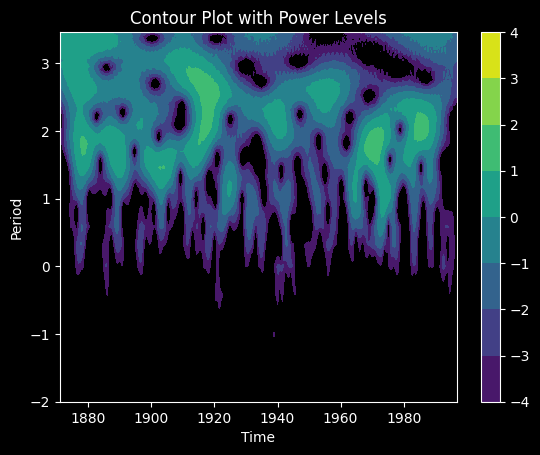

In [7]:
# contour plot
fig, ax = plt.subplots()
plt.style.use('dark_background')
period = 1 / freqs
power = np.power(abs(wavelet_coeffs), 2)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
contour = ax.contourf(time_range, np.log2(period), np.log2(power), np.log2(levels))
cbar = fig.colorbar(contour)
plt.title("Contour Plot with Power Levels")
plt.xlabel("Time")
plt.ylabel("Period")
plt.show()

## Plot 2: Phase Spectrum
Wavelet_coeff is a complex numbre with a real and an imaginary number (1 + 2i). The less common phase plot uses the imaginary component of the complex number

```python
import numpy as np

# note: np.angle() returns the angle of a complex argument

imaginary_component = np.angle(wavelet_coeffs)
```

The imaginary component represents the direction of the wavelet coefficient

size (44, 504) with 44 scales and 504 time steps
x-axis (time) be default is: 504
y-axis (scale) be default is: 44


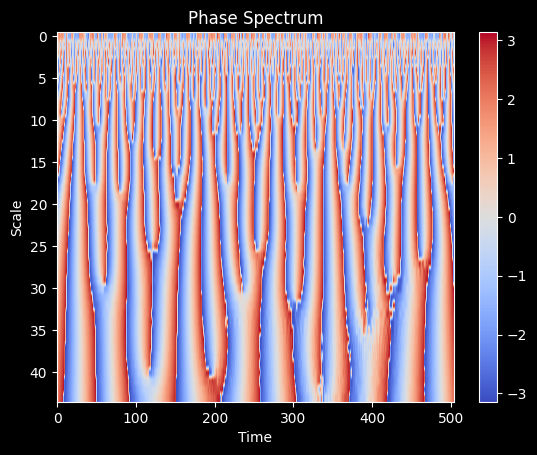

In [24]:
wavelet_mother = "cmor1.5-1.0" # Morlet in Torrence/Compo cooresponds to cmor in PyWavelets -> https://github.com/PyWavelets/pywt/issues/522#issuecomment-539227912

dt = 0.25 # sampling period (time between each y-value)
s0 = 0.25 # smallest scale
dj = 0.25 # spacing between discrete scales
n = len(sst_data)
jtot = 44
# npad = 1024 # pad with extra zeros (TODO)
# noise = 1 # test vs. red noise (TODO: no current implementation)
scales = np.arange(1, jtot+1)
wavelet_coeffs, freqs = pywt.cwt(data=sst_data,
                                 scales=scales,
                                 wavelet=wavelet_mother,
                                 sampling_period=dt)

# Shape of wavelet transform
print(f"size {wavelet_coeffs.shape} with {wavelet_coeffs.shape[0]} scales and {wavelet_coeffs.shape[1]} time steps")
print(f"x-axis (time) be default is: {wavelet_coeffs.shape[1]}")
print(f"y-axis (scale) be default is: {wavelet_coeffs.shape[0]}")

# Plot scalogram
fig, ax = plt.subplots()
plt.style.use('dark_background')
#data = np.arctan(np.imag(wavelet_coeffs)/abs(wavelet_coeffs))
data = np.angle(wavelet_coeffs)

# warning for non-postive int
#ax.set_yscale("log", base=2)
#import warnings
#warnings.filterwarnings('ignore')

plt.title("Phase Spectrum")
plt.xlabel("Time")
plt.ylabel("Scale")
plt.imshow(data, 
           vmax=(data).max(), vmin=(data).min(),
           cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.show()

## Cone of Influence and Significance Testing
TODO


# Compare NCL to PyWavelets Output

NCL dataframe is the same as the data from paos = True


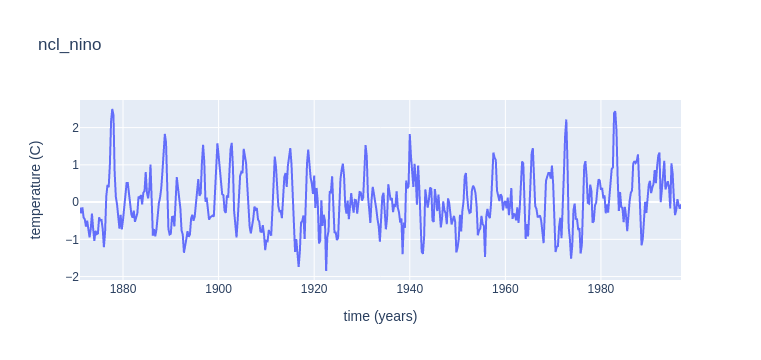

In [8]:
# Compare Output Coefficients
ncl_data = np.genfromtxt("data/ncl_csv.csv", skip_header=1, delimiter=',')
ncl_data = ncl_data[:,1]
time_range = (np.arange(0, len(ncl_data)) * dt) + time_0 # from 1871.00 to 1996.75
ncl_df = pd.DataFrame({'time (years)': time_range, 'temperature (C)': ncl_data})
ncl_df.head()
print(f"NCL dataframe is the same as the data from paos = {np.all(ncl_df == sst_df)}")
fig = px.line(data_frame=ncl_df, x="time (years)", y="temperature (C)",
              title="ncl_nino")
fig.show()

In [9]:
import numpy as np

with open("ncl/ncl_output.txt", "r") as f:
    lines = f.readlines()[30:]
    ncl_data = np.genfromtxt(lines, dtype="str")

ncl_0 = []
ncl_0_loc = []
ncl_1 = []
ncl_1_loc = []
for row in ncl_data:
    if int(row[0][1]) == 0:
        ncl_0_loc.append(row[0])
        ncl_0.append(float(row[1]))
    if int(row[0][1]) == 1:
        ncl_1.append(float(row[1]))
        ncl_1_loc.append(row[0])

ncl_0 = np.asarray(ncl_0)
ncl_0_loc = np.asarray(ncl_0_loc)
ncl_1 = np.asarray(ncl_1)
ncl_1_loc = np.asarray(ncl_1_loc)

In [10]:
pd.DataFrame(wavelet_coeffs).head()

,0,1,2,3,4,5,6,7,8,9,...,494,495,496,497,498,499,500,501,502,503
0,-0.000952+0.016315j,0.002033+0.012233j,-0.000814+0.004280j,-0.001798+0.018004j,0.000564+0.019885j,0.001646+0.013634j,-0.000972+0.007223j,-0.001695+0.022292j,0.004822+0.011606j,0.004379-0.024071j,...,0.010627+0.004991j,0.001427-0.057738j,-0.015113+0.004300j,-0.003632+0.071097j,0.007393+0.054785j,0.007284-0.000020j,-0.001618-0.019174j,-0.003267+0.003733j,0.001837+0.007509j,0.001597-0.006995j
1,0.005304-0.011478j,-0.006581+0.031612j,0.004400-0.050115j,-0.001354+0.059140j,0.000257-0.061215j,0.000339+0.061404j,-0.002883-0.056660j,0.004891+0.043227j,-0.002147-0.030535j,-0.001994+0.031100j,...,-0.011303+0.161079j,-0.005424-0.172570j,0.018476+0.130327j,-0.016519-0.070377j,0.009548+0.028759j,-0.006567-0.003551j,0.003540-0.013563j,0.001565+0.016761j,-0.003811-0.006756j,0.001782-0.002987j
2,0.026042+0.034228j,-0.046968+0.011001j,0.007413-0.042000j,0.032733+0.013857j,-0.004599+0.027982j,-0.037730+0.005980j,-0.003535-0.054552j,0.074463+0.009983j,-0.026472+0.084263j,-0.095448-0.046417j,...,-0.205952+0.139689j,-0.064086-0.228831j,0.210074+0.016358j,-0.054308+0.138104j,-0.075814-0.037240j,0.004161-0.043373j,0.045453-0.020062j,0.024642+0.053397j,-0.056395+0.012307j,0.001875-0.045774j
3,-0.007727+0.050628j,-0.057717-0.013587j,0.022327-0.063764j,0.069359+0.034378j,-0.049886+0.075455j,-0.083000-0.068439j,0.088743-0.092407j,0.103030+0.108499j,-0.124718+0.112892j,-0.118948-0.134504j,...,-0.259031+0.160861j,-0.152160-0.292964j,0.305094-0.152023j,0.155984+0.294358j,-0.264549+0.159038j,-0.157133-0.222746j,0.176890-0.148263j,0.132730+0.133541j,-0.096641+0.112576j,-0.090560-0.067510j
4,-0.007795+0.017914j,-0.015344-0.005355j,0.003277-0.004497j,-0.012820+0.006358j,-0.023098-0.028563j,0.034092-0.050943j,0.078999+0.026105j,-0.004321+0.110023j,-0.125076+0.032924j,-0.077168-0.121829j,...,-0.174444-0.138000j,0.058667-0.262495j,0.292135-0.045777j,0.139481+0.272627j,-0.202216+0.222411j,-0.256642-0.125314j,0.037553-0.254961j,0.212462-0.028740j,0.065448+0.161305j,-0.104254+0.083556j


In [11]:
ncl_0_df = pd.DataFrame({'ncl_0_loc': ncl_0_loc, 'ncl_output': ncl_0})
ncl_0_df.head()

,ncl_0_loc,ncl_output
0,"(0,0,0)",0.000358
1,"(0,0,1)",-0.000478
2,"(0,0,2)",0.000572
3,"(0,0,3)",-0.000626
4,"(0,0,4)",0.000646


In [12]:
ncl_1_df = pd.DataFrame({'ncl_1_loc': ncl_1_loc, 'ncl_output': ncl_1})
ncl_1_df.head()

,ncl_1_loc,ncl_output
0,"(1,0,0)",0.000480
1,"(1,0,1)",-0.000441
2,"(1,0,2)",0.000355
3,"(1,0,3)",-0.000247
4,"(1,0,4)",0.000138
